<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/T20_WC_matches.csv")

df['startDate'] = pd.to_datetime(df['startDate'])

def generate_impact_score(result):
    if 'Super Over' in result:
        return 90
    elif 'by' in result:
        margin = result.split('by')[1].split()[0]
        try:
            margin = int(margin)
            return 100 - margin if margin < 50 else 60 + margin // 2
        except ValueError:
            return 70
    elif 'Abandoned' in result:
        return 20
    else:
        return 50


df['MatchImpactScore'] = df['matchResult'].apply(generate_impact_score)

# Set startDate as index (required for time series)
df.set_index('startDate', inplace=True)

df


,Unnamed: 0,matchId,matchNumber,teamA_shortName,teamB_shortName,matchResult,stage,venue,MatchImpactScore
startDate,,,,,,,,,
2024-06-02 06:00:00+05:30,0,239603,Match 1,USA,CAN,USA beat Canada by 7 wickets,Group,"Grand Prairie Cricket Stadium, Dallas",93
2024-06-02 20:00:00+05:30,1,239604,Match 2,WI,PNG,West Indies beat Papua New Guinea by 5 wickets,Group,"Guyana National Stadium, Guyana",95
2024-06-03 06:00:00+05:30,2,239605,Match 3,NAM,OMA,Oman tied with Namibia (Namibia win Super Over...,Group,"Kensington Oval, Bridgetown, Barbados",90
2024-06-03 20:00:00+05:30,3,239606,Match 4,SL,SA,South Africa beat Sri Lanka by 6 wickets,Group,"Nassau County International Cricket Stadium, N...",94
2024-06-04 06:00:00+05:30,4,239607,Match 5,AFG,UGA,Afghanistan beat Uganda by 125 runs,Group,"Guyana National Stadium, Guyana",122
2024-06-04 20:00:00+05:30,5,239608,Match 6,ENG,SCO,Match Abandoned,Group,"Kensington Oval, Bridgetown, Barbados",20
2024-06-04 21:00:00+05:30,6,239609,Match 7,NED,NEP,Netherlands beat Nepal by 6 wickets,Group,"Grand Prairie Cricket Stadium, Dallas",94
2024-06-05 20:00:00+05:30,7,239610,Match 8,IND,IRE,India beat Ireland by 8 wickets,Group,"Nassau County International Cricket Stadium, N...",92
2024-06-06 05:00:00+05:30,8,239611,Match 9,PNG,UGA,Uganda beat Papua New Guinea by 3 wickets,Group,"Guyana National Stadium, Guyana",97


In [ ]:
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.head()

,matchId,matchNumber,teamA_shortName,teamB_shortName,matchResult,stage,venue,MatchImpactScore
startDate,,,,,,,,
2024-06-02 06:00:00+05:30,239603,Match 1,USA,CAN,USA beat Canada by 7 wickets,Group,"Grand Prairie Cricket Stadium, Dallas",93
2024-06-02 20:00:00+05:30,239604,Match 2,WI,PNG,West Indies beat Papua New Guinea by 5 wickets,Group,"Guyana National Stadium, Guyana",95
2024-06-03 06:00:00+05:30,239605,Match 3,NAM,OMA,Oman tied with Namibia (Namibia win Super Over...,Group,"Kensington Oval, Bridgetown, Barbados",90
2024-06-03 20:00:00+05:30,239606,Match 4,SL,SA,South Africa beat Sri Lanka by 6 wickets,Group,"Nassau County International Cricket Stadium, N...",94
2024-06-04 06:00:00+05:30,239607,Match 5,AFG,UGA,Afghanistan beat Uganda by 125 runs,Group,"Guyana National Stadium, Guyana",122


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

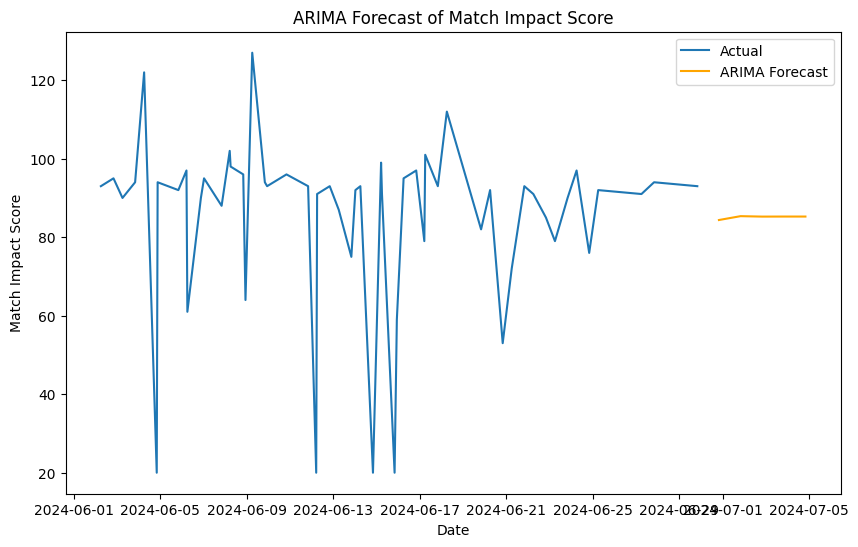

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# ARIMA model
arima_model = ARIMA(df['MatchImpactScore'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecasting the next 5 matches
arima_forecast = arima_fit.forecast(steps=5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MatchImpactScore'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=6, freq='D')[1:], arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast of Match Impact Score')
plt.xlabel('Date')
plt.ylabel('Match Impact Score')
plt.legend()
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.2046
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0685
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0374
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0618
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0291
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0348
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0444
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0313
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0714
Epoch 10/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361
Epoch 11/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0437
Epoch 12/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0649
Epoch 13/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0382
Epoch 14/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0439
Epoch 15/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0588
Epoch 16/20
52/52 ━━━━━━━━━━━━

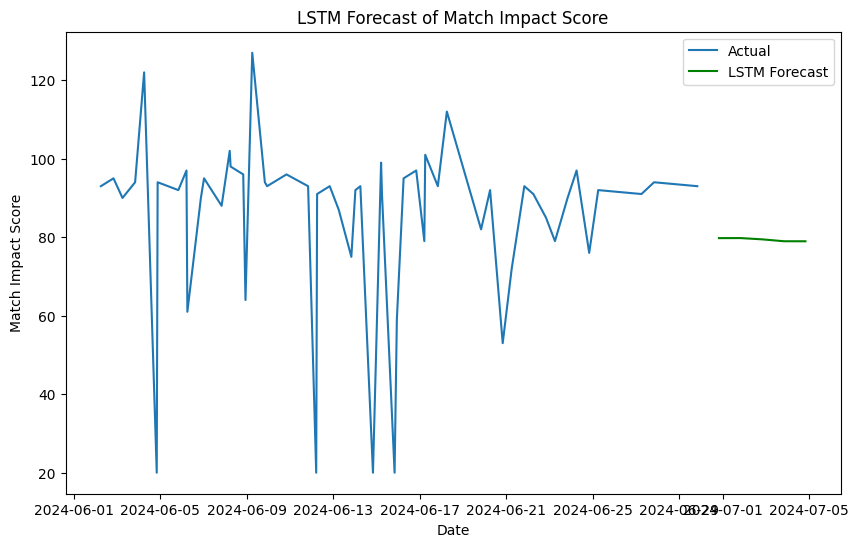

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['MatchImpactScore']])

X, y = [], []
for i in range(3, len(scaled_data)):
    X.append(scaled_data[i-3:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, batch_size=1, epochs=20)

predicted_values = []
for i in range(5):
    input_data = scaled_data[-3:]
    input_data = np.reshape(input_data, (1, input_data.shape[0], 1))
    prediction = model.predict(input_data)
    predicted_values.append(prediction[0, 0])
    scaled_data = np.append(scaled_data, prediction)

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MatchImpactScore'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=6, freq='D')[1:], predicted_values, label='LSTM Forecast', color='green')
plt.title('LSTM Forecast of Match Impact Score')
plt.xlabel('Date')
plt.ylabel('Match Impact Score')
plt.legend()
plt.show()


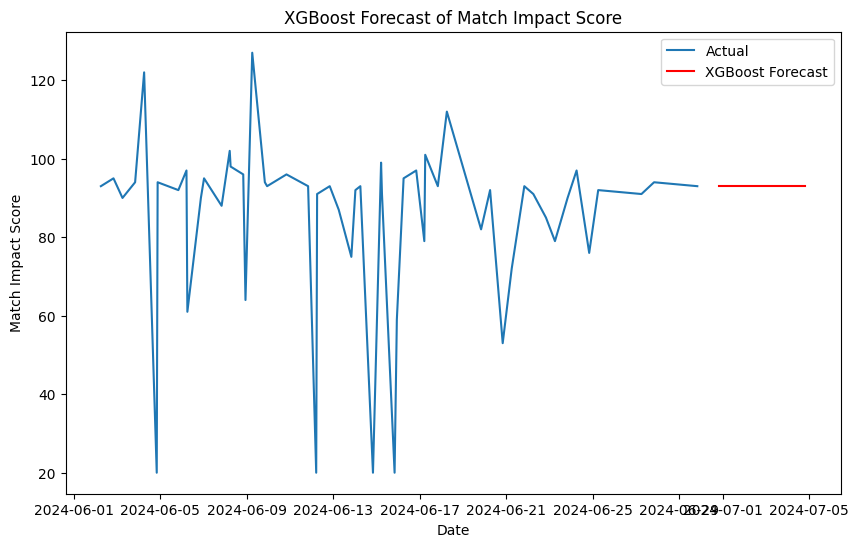

In [ ]:
from xgboost import XGBRegressor

X = np.array([i for i in range(len(df))]).reshape(-1, 1)
y = df['MatchImpactScore'].values

xg_model = XGBRegressor(n_estimators=1000)
xg_model.fit(X, y)

future_X = np.array([i for i in range(len(df), len(df) + 5)]).reshape(-1, 1)
xg_forecast = xg_model.predict(future_X)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MatchImpactScore'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=6, freq='D')[1:], xg_forecast, label='XGBoost Forecast', color='red')
plt.title('XGBoost Forecast of Match Impact Score')
plt.xlabel('Date')
plt.ylabel('Match Impact Score')
plt.legend()
plt.show()
